<a href="https://colab.research.google.com/github/SMSinclair/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Stephen_Sinclair_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import math

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def mvs(list):
  '''
  Parameter: numeric list
  
  Returns: a tuple with mean, variance, and standard deviation
  '''
  mean = sum(list)/len(list)
  variance = sum([(mean-i)**2 for i in list])/len(list)
  std_dev = math.sqrt(variance)
  
  return mean, variance, std_dev

In [0]:
mvs(sales)

(3052.714285714286, 183761.06122448976, 428.67360686714756)

In [0]:
# Find the standard deviation of sales for last week

s_one = mvs(sales)[2]
s_one

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import numpy as np

cust = [127, 80, 105, 92, 120, 115, 93]

In [0]:
np.var(sales, ddof=0)

183761.06122448976

In [0]:
np.var(cust, ddof=0)

249.3877551020408

In [0]:
np.cov(sales, cust, ddof=0)

array([[183761.06122449,   6518.02040816],
       [  6518.02040816,    249.3877551 ]])

In [0]:
covariance = np.cov(sales, cust, ddof=0)[0][1]
covariance

6518.020408163265

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# Find the standard deviation of customers who entered the store last week

s_two = mvs(cust)[2]
s_two

15.792015549069118

In [0]:
# Use the standard deviations to standardize the covariance to find the 
# correlation coefficient

# r = cov(X,Y)/s1*s2

r = covariance/(s_one*s_two)
r

0.9628339778148909

In [0]:
# Sanity check -- looks good

np.corrcoef(sales, cust)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic.shape

(1310, 16)

In [0]:
titanic.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [0]:
titanic.describe(exclude='number')

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1310,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,917,39,64


In [0]:
titanic.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [0]:
# Calculate the variance co-variance matrix

titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
# Calculate the correlation matrix

titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


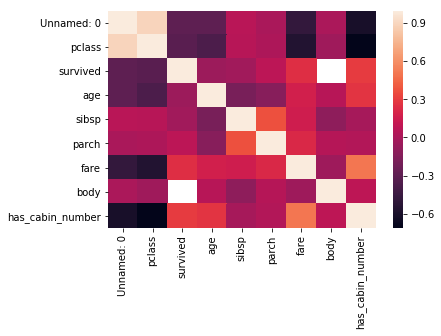

In [0]:
import seaborn as sns
sns.heatmap(titanic.corr())

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

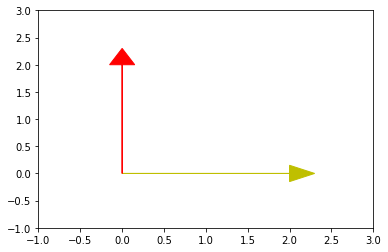

In [0]:
# "Perpendicular" is a synonym for "orthogonal"

import matplotlib.pyplot as plt


plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.arrow(0, 0, 2, 0, head_width=.3, head_length=0.3, color = 'y')
plt.arrow(0, 0, 0, 2, head_width=.3, head_length=0.3, color = 'r')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5,3,7]
b = [6,-8,2]

In [0]:
# The dot product of the two vectors is not equal to zero, so they are not 
# orthogonal

np.dot(a,b)==0

False


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2,-15,6,20]

In [0]:
norm_c = np.linalg.norm(c)
norm_c

25.787593916455254

In [0]:
# Norm of c squared:

norm_c**2

665.0

In [0]:
# Dot product of c and c:

np.dot(c,c)

665

In [0]:
np.matmul(np.transpose(c), c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11\\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0\\0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1\\0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0\\1 \end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4,12,11,9,2]

In [0]:
mag = np.linalg.norm(f)
mag

19.131126469708992

In [0]:
fhat = f/mag
fhat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [0]:
# Sanity check -- pretty close, probably a rounding error.

np.linalg.norm(fhat)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

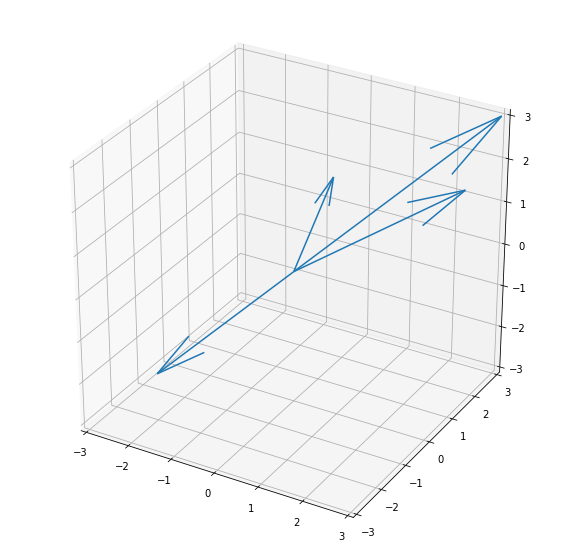

In [0]:
from mpl_toolkits.mplot3d import Axes3D


soa = np.array([[0, 0, 0, 3, 3, 3], [0, 0, 0, -2, -2, -2],
                [0, 0, 0, 3, 1.5, 2], [0, 0, 0, 0.5, 0.7, 2]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

\begin{align}
 m = \begin{bmatrix}
  1 & 0 \\
  4 & 8 
 \end{bmatrix}
\end{align}

\begin{align}det(m) = (1)(8) - (0)(4) = 8\end{align}

The determinant of the matrix with g and h as column vectors is non-zero. Therefore, they are linearly independent and span $\mathbb{R}^2$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
m = np.array([
    [1,-1,4],
    [2,0,8],
    [3,7,2]
])

In [0]:
# The determinant of the matrix with l, m, and n as column vectors is non-zero. 
# Therefore, they are linearly independent and span the two-dimensional plane.
np.linalg.det(m)

-20.000000000000007

In [0]:
# Find the rank of the matrix

np.linalg.matrix_rank(m)

3

The matrix is rank 3 so its columns can span $\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



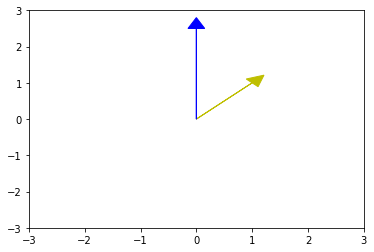

In [0]:
plt.xlim(-3,3)          
plt.ylim(-3,3)
plt.arrow(0, 0, 1, 1, head_width=.3, head_length=0.3, color = 'y')
plt.arrow(0, 0, 0, 2.5, head_width=.3, head_length=0.3, color = 'b')

## 6.2 What does it mean to form a basis?

Any linearly independent subset that spans an entire vector space forms a basis for it. Any vector in the space can be rewritten as a linear combination of the basis vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p = np.array([
    [1,2,3],
    [-1,0,7],
    [4,8,2]
])

In [0]:
# I failed to show rank < 3 with Gaussian Elimination, but this confirms that 
# that failure isn't just due to lack of skill.

np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimension of vector space that is spanned by its columns.



# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

In [0]:
v = np.array([1,3])
w = np.array([-1,2])

num = np.dot(w,v)
denom = np.dot(v,v)

np.dot(num/denom,v)

array([0.5, 1.5])

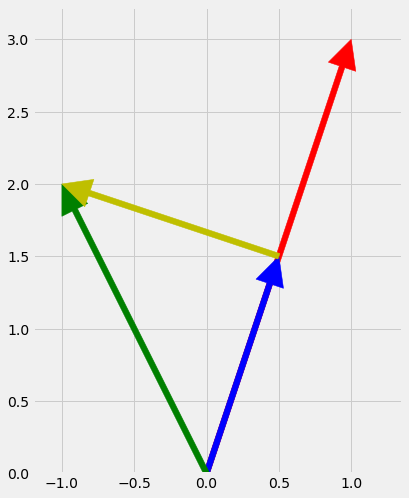

In [33]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

style.use('fivethirtyeight')

plt.figure(figsize=(12,8))
plt.xlim(-1.2,1.35)          
plt.ylim(0,3.225)

ax = plt.gca()
ax.set_aspect('equal')

plt.arrow(0, 0, 1, 3, width=.04, length_includes_head=True, head_width=.2, head_length=0.2, color = 'r')
plt.arrow(0, 0, 0.5, 1.5, width=.04, length_includes_head=True, head_width=.2, head_length=0.2, color = 'b')

plt.arrow(0, 0, -1, 2, width=.04, length_includes_head=True, head_width=.2, head_length=0.2, color = 'g')
plt.arrow(0.5, 1.5, -1.5, 0.5, width=.04, length_includes_head=True, head_width=.2, head_length=0.2, color = 'y')

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

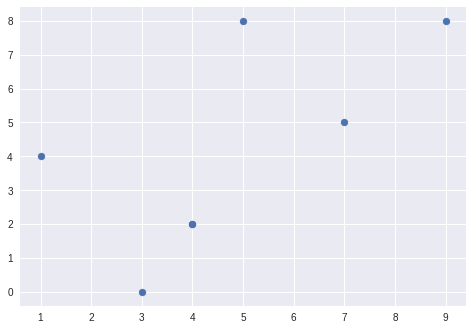

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()